In [2]:
options(warn = -1)
library(fPortfolio)
library(dplyr)
library(tidyr)
library(tidyquant)

In [19]:
acoes <- c("TRPL4.SA","ITSA4.SA","ITUB4.SA","EGIE3.SA","CPLE3.SA",
           "LREN3.SA","HYPE3.SA","B3SA3.SA","VVAR3.SA","ABCB4.SA",
          "SUZB3.SA","BEES3.SA","ABEV3.SA","FLRY3.SA")
ret_d <- tq_get(acoes, from = "2019-07-28") %>%
  group_by(symbol) %>%
  tq_transmute(select = close, mutate_fun = periodReturn, period = "daily")

In [20]:
ret <- ret_d %>%
  spread(key = symbol, value = daily.returns)
ret_ts <- as.timeSeries(ret)

In [21]:
eficiente <- efficientPortfolio(ret_ts)
fronteira <- portfolioFrontier(data = ret_ts)

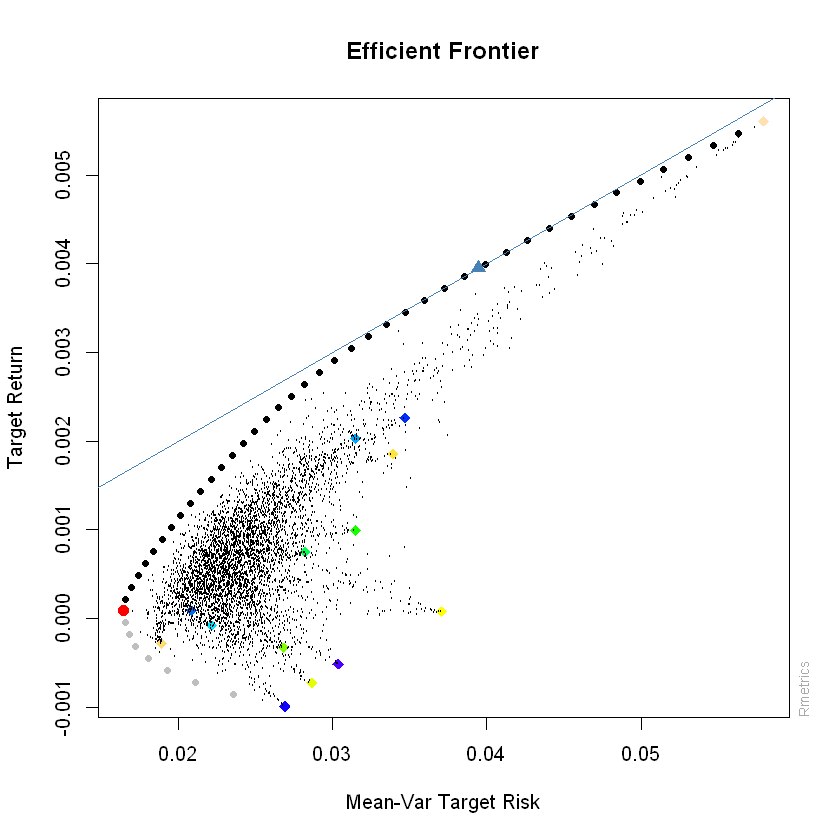

In [22]:
plot(fronteira,c(1,2,3,4,7))

In [24]:
eficiente@portfolio


Title:
 MV Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
ABCB4.SA ABEV3.SA B3SA3.SA BEES3.SA CPLE3.SA EGIE3.SA FLRY3.SA HYPE3.SA 
  0.0000   0.0034   0.0000   0.3011   0.0000   0.1547   0.0000   0.0000 
ITSA4.SA ITUB4.SA LREN3.SA SUZB3.SA TRPL4.SA VVAR3.SA 
  0.0000   0.0000   0.0000   0.1090   0.4318   0.0000 

Covariance Risk Budgets:
ABCB4.SA ABEV3.SA B3SA3.SA BEES3.SA CPLE3.SA EGIE3.SA FLRY3.SA HYPE3.SA 
  0.0000   0.0034   0.0000   0.3011   0.0000   0.1547   0.0000   0.0000 
ITSA4.SA ITUB4.SA LREN3.SA SUZB3.SA TRPL4.SA VVAR3.SA 
  0.0000   0.0000   0.0000   0.1090   0.4318   0.0000 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0001 0.0165 0.0460 0.0263 

Description:
 Fri Jul 31 01:03:46 2020 by user: x 